In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
plt.style.use("ggplot")

In [2]:
! gdown 1905n7p6y5j12zkT-vg7Pap-VhQpbKHys
! gdown 1ece6MvAtRuQZv652kAorPlPK52YH05qS

Downloading...
From: https://drive.google.com/uc?id=1905n7p6y5j12zkT-vg7Pap-VhQpbKHys
To: /content/PatientTreatment.csv
100% 37.8k/37.8k [00:00<00:00, 35.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ece6MvAtRuQZv652kAorPlPK52YH05qS
To: /content/transaction.csv
100% 651k/651k [00:00<00:00, 89.3MB/s]


# Part 1

In [3]:
df = pd.read_csv("PatientTreatment.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"])
df

patient           action      resource            DateTime
0     patient 0    First consult      Dr. Anna 2017-01-02 11:40:11
1     patient 0       Blood test           Lab 2017-01-02 12:47:33
2     patient 0    Physical test   Nurse Jesse 2017-01-02 12:53:50
3     patient 0   Second consult      Dr. Anna 2017-01-02 16:21:06
4     patient 0          Surgery   Dr. Charlie 2017-01-05 13:23:09
..          ...              ...           ...                 ...
685  patient 99       X-ray scan        Team 2 2017-05-25 11:03:27
686  patient 99    Physical test   Nurse Corey 2017-05-25 11:55:24
687  patient 99   Second consult      Dr. Anna 2017-05-29 15:12:39
688  patient 99         Medicine      Pharmacy 2017-05-29 16:17:13
689  patient 99    Final consult      Dr. Anna 2017-05-31 12:46:43

[690 rows x 4 columns]

## 1) Data Analysis

### a) Unique Patients

In [4]:
len(df["patient"].unique())

100

### b) Barplot of actions

In [5]:
df["action"].value_counts(ascending=True)

 Surgery            20
 Medicine           80
 X-ray scan         90
 First consult     100
 Blood test        100
 Physical test     100
 Second consult    100
 Final consult     100
Name: action, dtype: int64

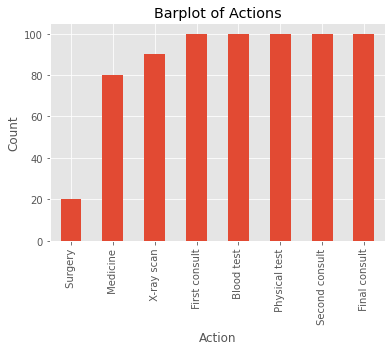

In [6]:
df["action"].value_counts(ascending=True).plot(kind="bar")
plt.title("Barplot of Actions"); plt.xlabel("Action"); plt.ylabel("Count")
plt.show()

<blockquote>

Surgery is the least frequent action, and First consult, Blood test, Physical test, Second consult, Final consult have are the most frequent actions. (Apparently the most frequent actions are part of a procedure and are done on every patient; however, surgery, medicine and x-ray are not required for all.)

### c) Resource Barplot

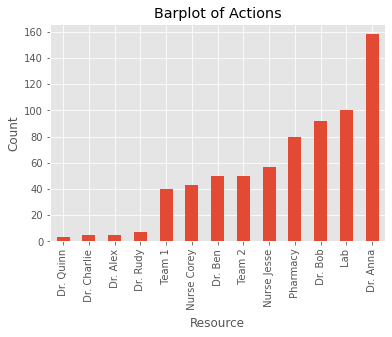

In [7]:
df["resource"].value_counts(ascending=True).plot(kind="bar")
plt.title("Barplot of Actions"); plt.xlabel("Resource"); plt.ylabel("Count")
plt.show()

<blockquote>

Dr. Quinn has the highest frequency, and Dr. Anna has the Most.

## 2) Resource Action DateTime

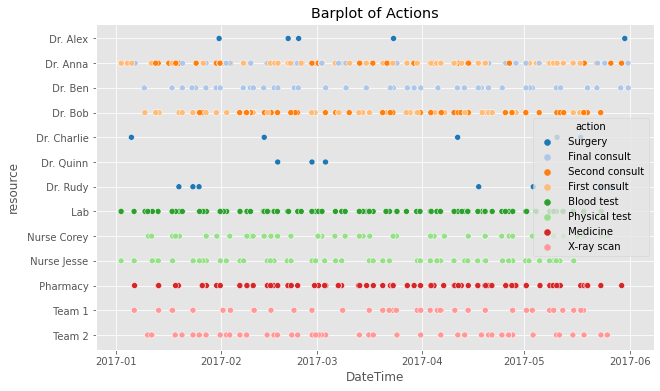

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sort_values("resource"), x='DateTime', y='resource', hue='action', palette="tab20")
plt.title("Barplot of Actions")
plt.show()

<blockquote>

First of all we can see that Dr.Quinn does less actions than others and Dr.Anna does the most. Moreover, we can see that all actions of "Medicine" are done by Pharmacy which makes sense. Also, "X-ray" is done by Team 1 and Team 2 only. "Physical" tests are done by Nurses Jesse and Corey. "Blood" tests are the Lab's resposibility. As for doctors, it seems that Dr.Anna and Dr. Bob do most of the consultings, and final consults are mostly done by Dr. Ben (Dr. Anna does a few final consults but Dr. Bob does not at all). However, they do not operate and surgeries are done by doctors Charlie, Rudy, Alex, and Quinn, who only do surgeries and therefore less actions than others. 

## 3) Action Coverage

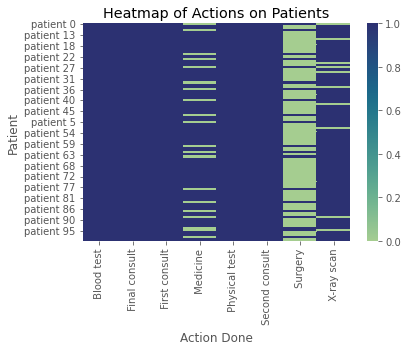

In [9]:
pdf = df[['patient', 'action', 'resource']].pivot(index=["patient"], columns=["action"])['resource']
pdf[~pdf.isna()] = 1
pdf[pdf.isna()] = 0
pdf = pdf.apply(pd.to_numeric)
sns.heatmap(pdf, cmap="crest")
plt.title("Heatmap of Actions on Patients"); plt.xlabel("Action Done"); plt.ylabel("Patient")
plt.show()

<blockquote>

As shown above, Blood test, First/Second/Final Consult, and Physical test are done for all patients which shows that they are part of the procedure. On the other hand, a few patients did not need x-ray or Medicine. And finally, surgery has been done on only a few patients.

## 4) Actions Duration

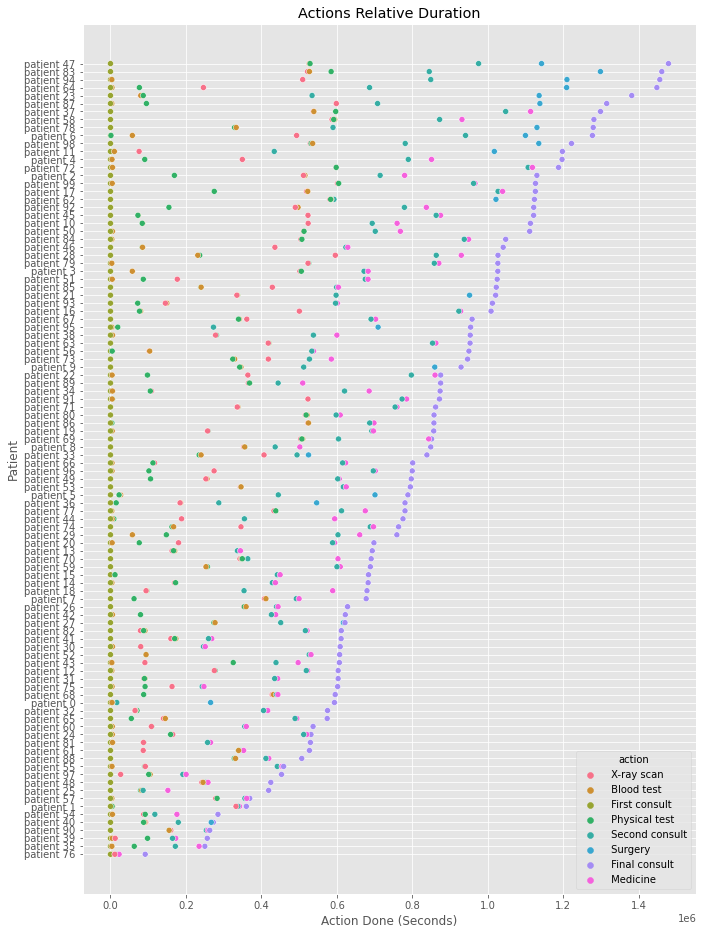

In [10]:
plt.figure(figsize=(11, 16))
df["first_action_dt"] = df.groupby("patient")["DateTime"].transform("min")
df["action_duration"] = (df["DateTime"] - df["first_action_dt"]).dt.total_seconds()  # /86400
df["action_duration_max"] = df.groupby("patient")["action_duration"].transform("max")
sns.scatterplot(data=df.sort_values("action_duration_max", ascending=False), x='action_duration', y='patient', hue='action')
plt.title("Actions Relative Duration"); plt.xlabel("Action Done (Seconds)"); plt.ylabel("Patient")
plt.show()

<blockquote>

First of all the range for total seconds is very large and it was better to consider days instead of seconds. Anyway, the last action which is final consult can happen from about a day after patient's first consult up to 16 days after that. Moreover, we can see the general order of actions which starts with first consult, goes on with tests and xray then second consultant and then medicine/surgery if needed and ends with final consultant.

## 5) Process Mining

action
 Blood test        100
 Final consult     100
 First consult     100
 Medicine           80
 Physical test     100
 Second consult    100
 Surgery            20
 X-ray scan         90
dtype: int64


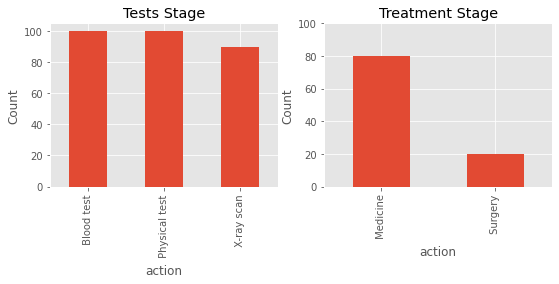

In [11]:
pdf = df[['patient', 'action', 'resource']].pivot(index=["patient"], columns=["action"])['resource']
pdf[~pdf.isna()] = 1
pdf[pdf.isna()] = 0
pdf = pdf.apply(pd.to_numeric)
print(pdf.sum())

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
pdf[[" Blood test", " Physical test", " X-ray scan"]].sum().plot(kind="bar")
plt.title("Tests Stage"); plt.ylabel("Count");
plt.subplot(1, 2, 2)
pdf[[" Medicine", " Surgery"]].sum().plot(kind="bar")
plt.title("Treatment Stage"); plt.ylabel("Count"); plt.ylim(0, 100)
plt.show()

<blockquote>

As seen above, all actions are done on all 100 patients except for Medicine (80/100), Surgery (20/100), and X-ray (90/100). 90 patients had x-ray in addition to other tests. And the treatment for patients has been 80 Medicine and 20 Surgeries and these two were done exclusively.

## 6) Surgery - Second Consult

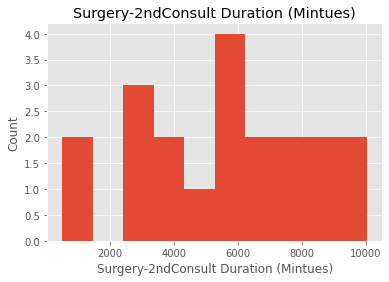

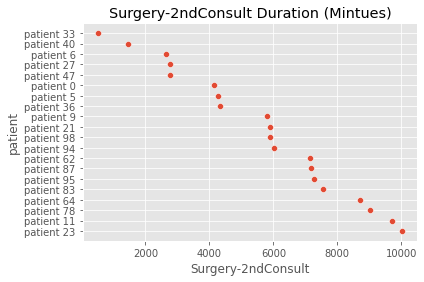

In [12]:
pdf = df[['patient', 'action', 'DateTime']].pivot(index=["patient"], columns=["action"])["DateTime"]
pdf["Surgery-2ndConsult"] = (pdf[" Surgery"] - pdf[" Second consult"]).dt.total_seconds() / 60  # /86400

pdf[["Surgery-2ndConsult"]].dropna().hist()
plt.title("Surgery-2ndConsult Duration (Mintues)"); plt.ylabel("Count"); plt.xlabel("Surgery-2ndConsult Duration (Mintues)")
plt.show()
sns.scatterplot(data=pdf.sort_values("Surgery-2ndConsult"), x="Surgery-2ndConsult", y="patient")
plt.title("Surgery-2ndConsult Duration (Mintues)");
plt.show()

<blockquote>

Again, minutes is too small for this data and days would shot the distribution better. The duration between surgery and second consult can be from less than a day up to 7 days. Although we only have 20 data points, based on them and their hostogram, most of the surgeries happended about 4 days after the 2n Consult. And generally it does not happen soon after that, but a few days are typical. Additionally, based on scatter plot, it seems there is a special time of day that the consult and surgery happen that has caused this pattern and the gap between days.

# Part 2

In [13]:
df = pd.read_csv("transaction.csv")
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df

transaction_id  product_id  customer_id transaction_date  online_order  \
0                   1           2         2950       2017-02-25           0.0   
1                   2           3         3120       2017-05-21           1.0   
2                   3          37          402       2017-10-16           0.0   
3                   4          88         3135       2017-08-31           0.0   
4                   5          78          787       2017-10-01           1.0   
...               ...         ...          ...              ...           ...   
19995           19996          51         1018       2017-06-24           1.0   
19996           19997          41          127       2017-11-09           1.0   
19997           19998          87         2284       2017-04-14           1.0   
19998           19999           6         2764       2017-07-03           0.0   
19999           20000          11         1144       2017-09-22           1.0   

      product_size  
0           medium  
1            large  
2           medium  
3           medium  
4            large  
...            ...  
19995       medium  
19996       medium  
19997       medium  
19998       medium  
19999        small  

[20000 rows x 6 columns]

## 1) Retention

### a) Monthly Retention Rate

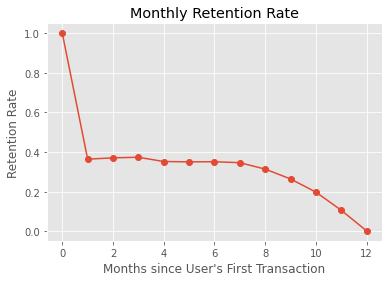

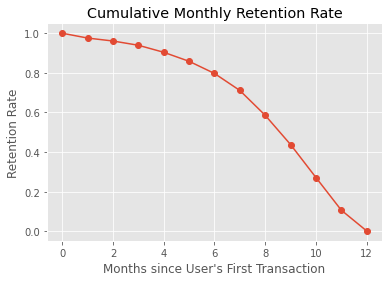

In [19]:
df["first_transaction"] = df.groupby(["customer_id"])["transaction_date"].transform("min")
df["retention_duration"] = df["transaction_date"] - df["first_transaction"]
df["retention_duration_months"] = (df["retention_duration"].dt.total_seconds() / 3600 / 24 / 30)
retention_rates = []
for month in range(0, 13):
    retention_rates.append(len(df[(df["retention_duration_months"] >= month) & (df["retention_duration_months"] < month + 1)]["customer_id"].unique()) / len(df["customer_id"].unique()))

plt.plot(retention_rates, '-o')
plt.title("Monthly Retention Rate"); plt.xlabel("Months since User's First Transaction"); plt.ylabel("Retention Rate")
plt.show()

df["first_transaction"] = df.groupby(["customer_id"])["transaction_date"].transform("min")
df["retention_duration"] = df["transaction_date"] - df["first_transaction"]
df["retention_duration_months"] = (df["retention_duration"].dt.total_seconds() / 3600 / 24 / 30)
retention_rates = []
for month in range(0, 13):
    retention_rates.append(len(df[(df["retention_duration_months"] >= month)]["customer_id"].unique()) / len(df["customer_id"].unique()))

plt.plot(retention_rates, '-o')
plt.title("Cumulative Monthly Retention Rate"); plt.xlabel("Months since User's First Transaction"); plt.ylabel("Retention Rate")
plt.show()

<blockquote>

First, the retention rate is 100% at first. Then by increasing months, the users that had a transactions after k months decreases. It is important for businesses to analyze this data and see if their business is working and keeping the users in their ecosystem or not. This can determine the future of the business. Here the decrease does not look very bad at first; however, after 8 months it is worrying and it means that the business loses about 90%  of users after 11 months and they should work on their business to make it more appealing to users in the long term.  The sooner the line flattens the better, but here it goes down all the way to about 10% in 11 months which is dangerous. (A reasonable business probably would need the line to flatten at about 20% or  even higher and stay like that)

### b) Retention vs. Online Order

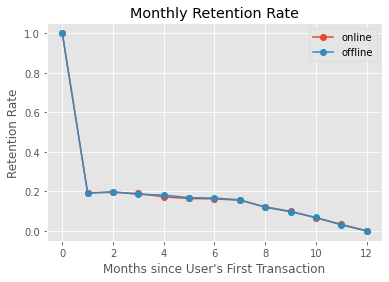

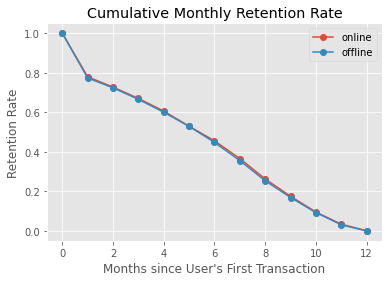

In [24]:
for online_order in df.dropna(subset=["online_order"])["online_order"].unique():
    odf = df[df["online_order"] == online_order].copy()
    odf["first_transaction"] = odf.groupby(["customer_id"])["transaction_date"].transform("min")
    odf["retention_duration"] = odf["transaction_date"] - odf["first_transaction"]
    odf["retention_duration_months"] = (odf["retention_duration"].dt.total_seconds() / 3600 / 24 / 30)
    retention_rates = []
    for month in range(0, 13):
        retention_rates.append(len(odf[(odf["retention_duration_months"] >= month) & (odf["retention_duration_months"] < month + 1)]["customer_id"].unique()) / len(odf["customer_id"].unique()))
    plt.plot(retention_rates, '-o', label="online" if online_order else "offline")

plt.title("Monthly Retention Rate"); plt.xlabel("Months since User's First Transaction"); plt.ylabel("Retention Rate")
plt.legend()
plt.show()

for online_order in df.dropna(subset=["online_order"])["online_order"].unique():
    odf = df[df["online_order"] == online_order].copy()
    odf["first_transaction"] = odf.groupby(["customer_id"])["transaction_date"].transform("min")
    odf["retention_duration"] = odf["transaction_date"] - odf["first_transaction"]
    odf["retention_duration_months"] = (odf["retention_duration"].dt.total_seconds() / 3600 / 24 / 30)
    retention_rates = []
    for month in range(0, 13):
        retention_rates.append(len(odf[(odf["retention_duration_months"] >= month)]["customer_id"].unique()) / len(odf["customer_id"].unique()))
    plt.plot(retention_rates, '-o', label="online" if online_order else "offline")

plt.title("Cumulative Monthly Retention Rate"); plt.xlabel("Months since User's First Transaction"); plt.ylabel("Retention Rate")
plt.legend()
plt.show()

<blockquote>

Online and offline orders are very similar in retention rate.
Online orders have a little higher retention rate than offline order (best sen in cumulative version) and it can be attributed to the fact that online order is easier to do and the comfort of it facilitates the retention of users. Howeverm this is very marginal and the difference is not significant.

### c) Retention vs. Product Size

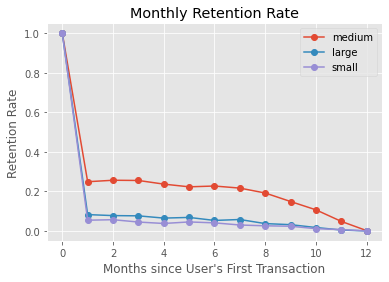

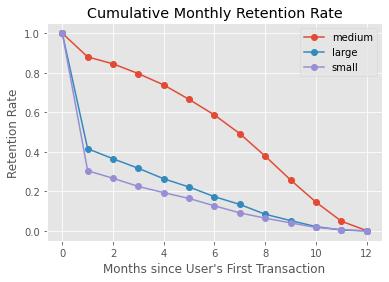

In [27]:
for product_size in df.dropna(subset=["product_size"])["product_size"].unique():
    odf = df[df["product_size"] == product_size].copy()
    odf["first_transaction"] = odf.groupby(["customer_id"])["transaction_date"].transform("min")
    odf["retention_duration"] = odf["transaction_date"] - odf["first_transaction"]
    odf["retention_duration_months"] = (odf["retention_duration"].dt.total_seconds() / 3600 / 24 / 30)
    retention_rates = []
    for month in range(0, 13):
        retention_rates.append(len(odf[(odf["retention_duration_months"] >= month) & (odf["retention_duration_months"] < month + 1)]["customer_id"].unique()) / len(odf["customer_id"].unique()))
    plt.plot(retention_rates, '-o', label=product_size)

plt.title("Monthly Retention Rate"); plt.xlabel("Months since User's First Transaction"); plt.ylabel("Retention Rate")
plt.legend()
plt.show()

for product_size in df.dropna(subset=["product_size"])["product_size"].unique():
    odf = df[df["product_size"] == product_size].copy()
    odf["first_transaction"] = odf.groupby(["customer_id"])["transaction_date"].transform("min")
    odf["retention_duration"] = odf["transaction_date"] - odf["first_transaction"]
    odf["retention_duration_months"] = (odf["retention_duration"].dt.total_seconds() / 3600 / 24 / 30)
    retention_rates = []
    for month in range(0, 13):
        retention_rates.append(len(odf[(odf["retention_duration_months"] >= month)]["customer_id"].unique()) / len(odf["customer_id"].unique()))
    plt.plot(retention_rates, '-o', label=product_size)

plt.title("Cumulative Monthly Retention Rate"); plt.xlabel("Months since User's First Transaction"); plt.ylabel("Retention Rate")
plt.legend()
plt.show()

<blockquote>

As demonstrated, medium size has the largest retention, wheras small and large have less retention rate. But the curve of none of them is satisfying through the end. Medium > Large > Small

## 2) Cohort

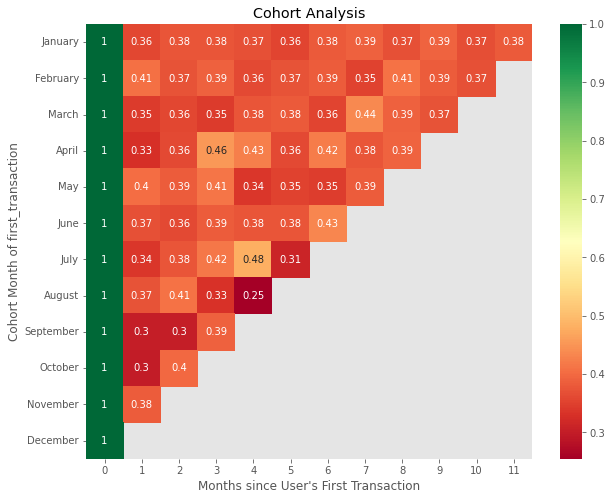

In [65]:
df["first_transaction"] = df.groupby(["customer_id"])["transaction_date"].transform("min")
cohort = []
new_users = []
for month in range(1, 13):
    odf = df[df["first_transaction"].dt.month == month].copy()
    odf["retention_duration"] = odf["transaction_date"] - odf["first_transaction"]
    odf["retention_duration_months"] = (odf["retention_duration"].dt.total_seconds() / 3600 / 24 / 30)
    retention_rates = []
    for m in range(0, 12):
        # retention_rates.append(len(odf[(odf["retention_duration_months"] >= m) & (odf["retention_duration_months"] < m + 1)]["customer_id"].unique()) / len(odf["customer_id"].unique()))
        retention_rates.append(len(odf[(odf["transaction_date"].dt.month == month + m)]["customer_id"].unique()) / len(odf["customer_id"].unique()))
    cohort.append(retention_rates)

cohort = pd.DataFrame(cohort, index=[datetime.date(1900, i, 1).strftime('%B') for i in range(1, 13)])
plt.figure(figsize=(10, 8))
sns.heatmap(cohort.replace(0, np.nan), annot=True, cmap="RdYlGn")
plt.title("Cohort Analysis"); plt.xlabel("Months since User's First Transaction"); plt.ylabel("Cohort Month of first_transaction")
plt.show()

<blockquote>

Based on cohort analysis we see that months Feb. May. Nov. have been better at returning the users in the first month. We see some months like 4 months after July where users return more which might be due to a notification the business sent to them. In general, the business owners can see the result of their actions on each cohort of users and decide if the action was good or not. 